# Pymaceuticals Inc. Capomulin Study
---
## Data Analysis
- After cleaning the dataset, there were found to be *248* unique mice.
- According to summary statistics, **Capomulin** & **Ramicane** had the smallest average tumor volumes out of the drug regimes in the study.
- On the other hand, **Infubinol** & **Ceftamin** had larger mean tumor volumes, indicating they might be less effective as medications.
- It is worth noting that both **Capomulin** & **Ramicane** were found to have the highest number of recorded observations out of the drug regimes.
- The pie chart shows an even distribution of male and female test subjects amongst the mice.
- **Infubinol** was the only drug with a potential outlier at *36.32 mm<sup>3</sup>* tumor volume.
- Our box plots confirmed that both **Capomulin** & **Ramicane** had smaller tumor volumes than the other drugs in the study.
- Examining the data for a single mouse ID (*1509*) treated with **Capomulin**, we're able to see a consistent decrease in tumor size.
- Our regression plot had a Pearson coefficient of *0.84*, indicating a strong positive correlation between mouse weight and tumor volume.

### Conclusions
- **Capomulin** and **Ramicane** were the most effective treatments, showing the smallest tumor volumes.
- **Infubinol** & **Ceftamin** had higher tumor volumes and potential outliers, indicating they were less effective.
- Mouse weight was strongly correlated with tumor volume (*p = 0.84*).
- Further research could investigate dosage optimization for **Capomulin** and **Ramicane**.

#### Final Recommendation:
**Capomulin** and **Ramicane** should be further investigated as potential treatment options for SCC.

---

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Import study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse_data and the study_results CSVs
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data from both CSVs into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Preview the data table for merged DataFrame
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = mouse_study_df["Mouse ID"].nunique()
print(f"Number of mice (n): {num_mice}")

Number of mice (n): 249


In [3]:
# Identify the duplicate mice by ID number that shows up for "Mouse ID" and "Timepoint" columns
duplicate_mice_ids = mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()

print(duplicate_mice_ids)

['g989']


In [4]:
# Display all the data for the identified duplicate mouse ID.
duplicate_mice = mouse_study_df[mouse_study_df["Mouse ID"].isin(duplicate_mice_ids)]

duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Clean DataFrame by dropping the duplicate mouse by its unique ID and generate a new DataFrame.
clean_mouse_study_df = mouse_study_df[~mouse_study_df["Mouse ID"].isin(duplicate_mice_ids)]

# Preview cleaned DataFrame
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame to ensure duplicate was dropped.
num_mice_clean = clean_mouse_study_df["Mouse ID"].nunique()
print(f"Number of unique mice after cleaning: {num_mice_clean}")

Number of unique mice after cleaning: 248


## Summary Statistics

In [7]:
# Calculate summary statistics of tumor volume for each "Drug Regimen" (mean, median, variance, std. dev., and SEM) using groupby function and display values in data table.
mean_tumor_volume = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Combine the calculated statistics into a formatted DataFrame
summary_stats= pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_std_dev,
    "Tumor Volume SEM": tumor_volume_sem
})

# Display the formatted summary statistics table
summary_stats.style.set_caption("Tumor Volume (mm<sup>3</sup>)")

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Alternatively generate statistical data from DataFrame via the aggregation method
summary_stats_alt = clean_mouse_study_df.groupby("Drug Regimen").agg(
    mean=("Tumor Volume (mm3)", "mean"),
    median=("Tumor Volume (mm3)", "median"),
    variance=("Tumor Volume (mm3)", "var"),
    std=("Tumor Volume (mm3)", "std"),
    sem=("Tumor Volume (mm3)", "sem")
)

# Print aggregated statistical table
summary_stats_alt.style.set_caption("Tumor Volume (mm<sup>3</sup>)")

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

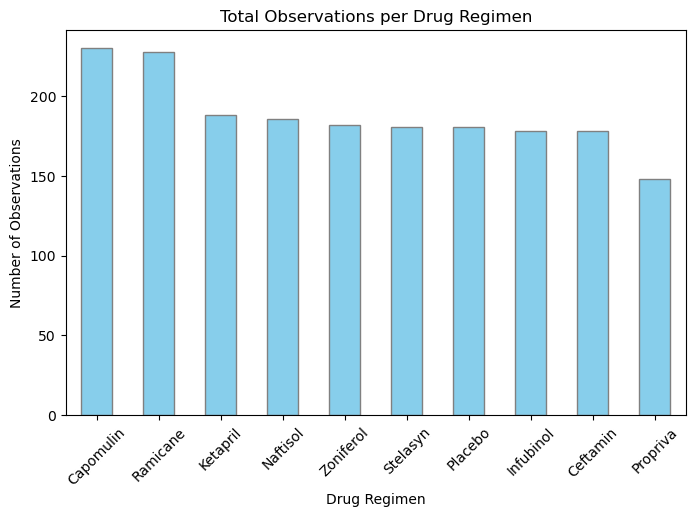

In [9]:
# Generate a bar plot using Pandas showing the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_counts = clean_mouse_study_df["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar", color="skyblue", edgecolor="grey", figsize=(8,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observations")
plt.title("Total Observations per Drug Regimen")
plt.xticks(rotation=45)
plt.show()

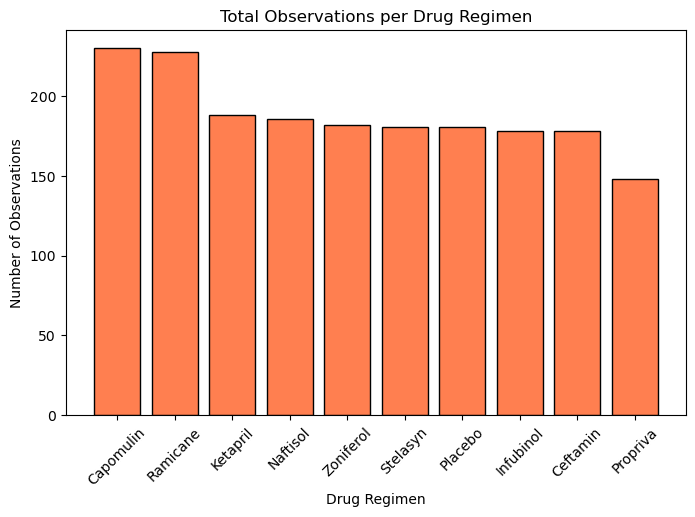

In [10]:
# Generate a bar plot using pyplot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen
plt.figure(figsize=(8,5))
plt.bar(drug_counts.index, drug_counts.values, color="coral", edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observations")
plt.title("Total Observations per Drug Regimen")
plt.xticks(rotation=45)
plt.show()

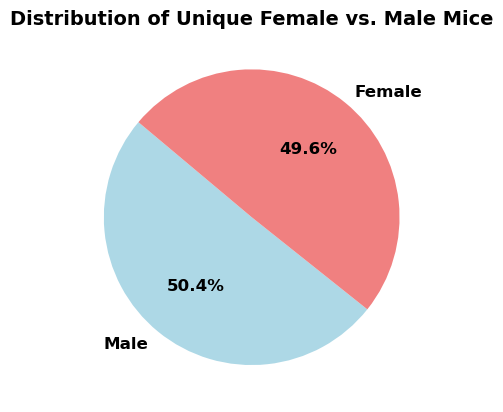

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = clean_mouse_study_df.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()

# Make the pie chart using Pandas
gender_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["lightblue", "lightcoral"],
    startangle=140,
    textprops={"fontsize": 12, "fontweight": "bold"}
)

# Set title and remove y-axis label (default in Pandas pie charts)
plt.title("Distribution of Unique Female vs. Male Mice", fontsize=14, fontweight="bold")
plt.ylabel("")  # Hide the default y-label

# Display the pie chart
plt.show()

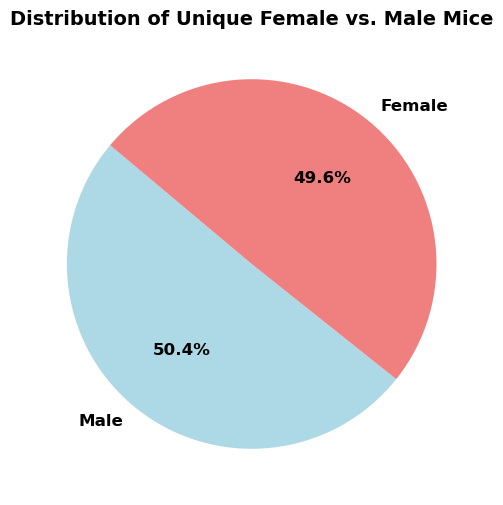

In [12]:
# Get the unique mice with their gender
gender_counts = clean_mouse_study_df.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()

# Make the pie chart using Matplotlib
plt.figure(figsize=(6,6))  # Set figure size
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct="%1.1f%%", 
    colors=["lightblue", "lightcoral"], 
    startangle=140, 
    textprops={"fontsize": 12, "fontweight": "bold"}
)

# Set title
plt.title("Distribution of Unique Female vs. Male Mice", fontsize=14, fontweight="bold")

# Display the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = clean_mouse_study_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = final_timepoints.merge(clean_mouse_study_df, on=["Mouse ID", "Timepoint"], how="left")

# Print new Dataframe
final_tumor.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Place unique drug regime values into a list for for loop and plot labels later in the code
treatment_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Generate an empty list to fill with tumor volume data
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for drug in treatment_drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor.loc[final_tumor["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Add subset of tumor volumes to the list for plotting
    tumor_volume_data.append(tumor_volumes)

    # Compute quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - 1.5 * iqr
    upper_bound = quartiles[0.75] + 1.5 * iqr

    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the potential outliers for each drug
    print(f"\n{drug} potential outliers:\n{outliers}")


Capomulin potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


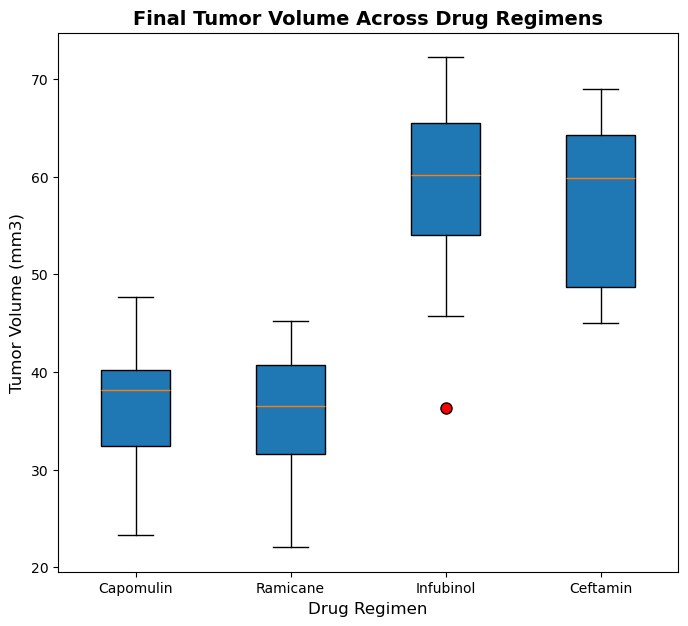

In [15]:
# Create a box plot to show the distribution of tumor volume for each treatment group
plt.figure(figsize=(8,7))
plt.boxplot(tumor_volume_data, tick_labels=treatment_drugs, patch_artist=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8, "linestyle": "none"})
plt.title("Final Tumor Volume Across Drug Regimens", fontsize=14, fontweight="bold")
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

plt.show()

## Line and Scatter Plots

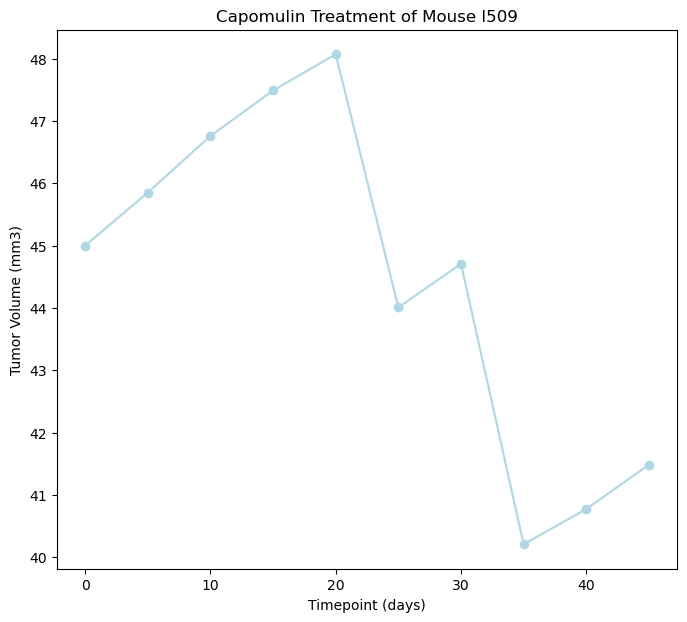

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
capomulin_mouse = clean_mouse_study_df[clean_mouse_study_df["Mouse ID"] == mouse_id]

plt.figure(figsize=(8,7))
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"], marker="o", linestyle="-", color="lightblue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.show()

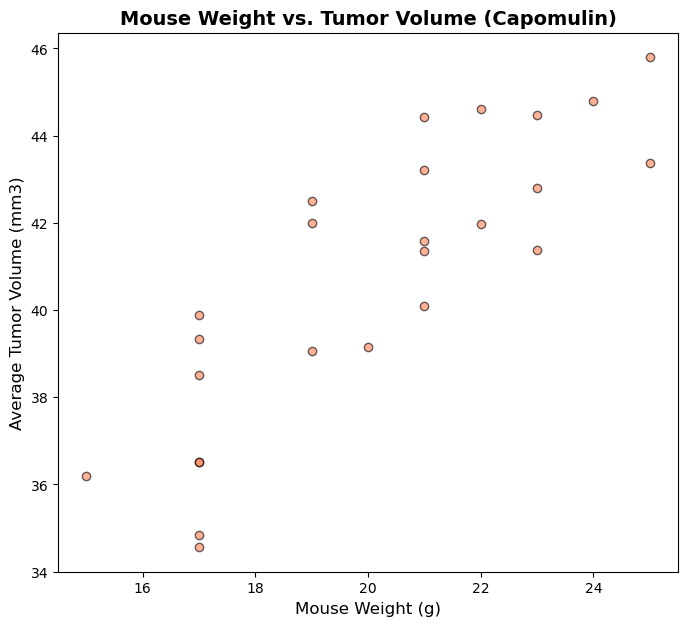

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_study_df[clean_mouse_study_df["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID to calculate the average tumor volume per mouse
capomulin_avg = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Mouse_Weight=("Weight (g)", "mean")
).reset_index()

# Generate scatter plot
plt.figure(figsize=(8,7))
plt.scatter(capomulin_avg["Mouse_Weight"], capomulin_avg["Avg_Tumor_Volume"], 
            color="coral", alpha=0.6, edgecolors="black")
plt.xlabel("Mouse Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.title("Mouse Weight vs. Tumor Volume (Capomulin)", fontsize=14, fontweight="bold")

plt.show()

## Correlation and Linear Regression

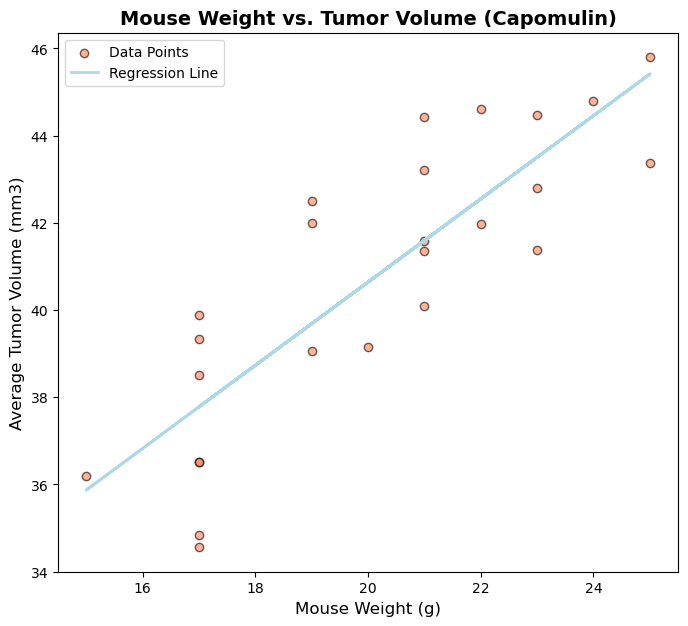

The correlation coefficient (r) is: 0.84


In [18]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_avg["Mouse_Weight"], capomulin_avg["Avg_Tumor_Volume"])

# Generate regression line values
regression_line = slope * capomulin_avg["Mouse_Weight"] + intercept

# Create scatter plot
plt.figure(figsize=(8,7))
plt.scatter(capomulin_avg["Mouse_Weight"], capomulin_avg["Avg_Tumor_Volume"], 
            color="coral", alpha=0.6, edgecolors="black", label="Data Points")

# Plot regression line
plt.plot(capomulin_avg["Mouse_Weight"], regression_line, color="lightblue", linewidth=2, label="Regression Line")
plt.xlabel("Mouse Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.title("Mouse Weight vs. Tumor Volume (Capomulin)", fontsize=14, fontweight="bold")
plt.legend()

plt.show()

# Print correlation coefficient
print(f"The correlation coefficient (r) is: {r_value:.2f}")